In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
data_base = automap_base()
# reflect the tables
data_base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
data_base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = data_base.classes.measurement
station = data_base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

Text(0.5, 0, 'Date')

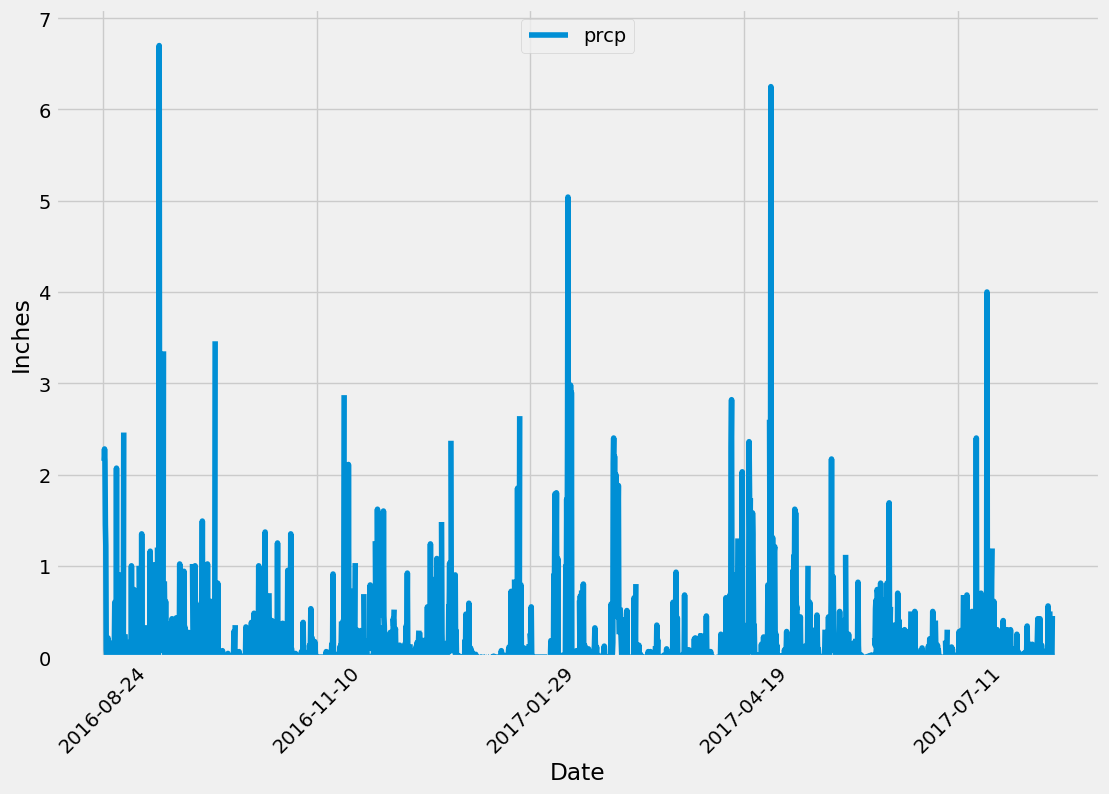

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_date = dt.date(2017, 8, 24)

# Calculate the date one year from the last date in data set.
end_date = start_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_precipitation_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= end_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_prcp_df = pd.DataFrame(data_precipitation_scores)
date_prcp_df = date_prcp_df.set_index('date')

# Sort the dataframe by date
sorted_df = date_prcp_df.sort_values(by = ["date"])



sorted_df
# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(figsize = (12,8), rot = 45)
plt.legend(loc = 'upper center')
plt.ylim(0,7.10)
plt.ylabel('Inches')
plt.xlabel('Date')

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
stat_prcp = sorted_df.describe()

stat_prcp

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
station_count = [session.query(station.id).count()]
station_count

[9]

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactive = 'USC00519281'
temperatures = session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == mostactive).all()
temperatures

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'tobs frequency')

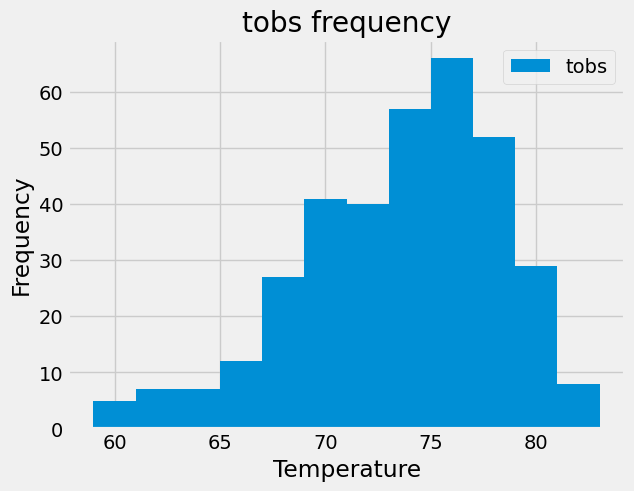

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).filter(measurement.station == "USC00519281").filter(measurement.date >= end_date)

yearly_temp_df = pd.DataFrame(temp_data)


yearly_temp_df.plot(kind = "hist", bins = 12)
plt.xlabel("Temperature")
plt.title("tobs frequency")

# Close Session

In [34]:
# Close Session
session.close()